# 1. DTM 활용-유사도
1. 데이터 처리 및 DTM 생성

In [ ]:
!pip install konlpy

In [ ]:
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch08/ratings_train.txt -O ratings_train.txt
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch08/ratings_test.txt -O ratings_test.txt

In [ ]:
#위의 데이터로 label을 분류하는 모형을 만드세요
#train셋으로 모델링, test셋으로 범주 분류해주세요.
#Okt, 명사 사용하세요
#train에서는 15만개 중에서 1500개만 랜덤하게 선택하셔서 모델링하세요
#test에서는 약 500개만 선택하셔서 정분류율을 계산하세요.
#16분까지해보세요.
train = pd.read_csv('ratings_train.txt', sep='\t', index_col=0)
test = pd.read_csv('ratings_test.txt', sep='\t', index_col=0)

train = train.iloc[0:1500, :]
test = test.iloc[0:500, :]

okt = Okt()
def token1(text):
  tokenized = okt.nouns( text)
  return tokenized

from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(tokenizer=token1).fit( train.document )
train_dtm = vect.transform(train)
test_dtm = vect.transform(test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(train_dtm, train.label)   #공통 단어가 거의 없어서 오류....
rf.score( test_dtm, test.label)

In [40]:
train_dtm

<2x3157 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [ ]:
import pandas as pd
train_df = pd.read_csv('ratings_test.txt', sep='\t')#탭으로 값이 구분된 파일
print(train_df.shape)
train_df = train_df.iloc[0:1000, :]
train_df.head(7)

(150000, 3)


id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
5   5403919      막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.      0
6   7797314                              원작의 긴장감을 제대로 살려내지못했다.      0

In [ ]:
from konlpy.tag import Okt
twitter = Okt() #open korean text 형태소분석기
def tw_tokenizer(text):
    tokens_ko = twitter.nouns(text) #명사만 추출
    return tokens_ko

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, min_df=5 )
tfidf_vect.fit(train_df['document'])  #train의 명사를 뽑은 것까지
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
tfidf_vect.vocabulary_.keys()

dict_keys(['진짜', '포스터', '보고', '영화', '줄', '연기', '추천', '이야기', '재미', '평점', '의', '막', '움', '원작', '긴장감', '별', '욕', '정말', '드라마', '사람', '액션', '꽤', '볼', '데', '자극', '멜로', '손', '때', '그', '것', '가장', '감동', '임', '스토리', '코', '그냥', '이해', '왜', '갈수록', '이건', '캐스팅', '위', '놈', '절대', '걸', '나름', '듯', '건', '도', '별로', '수작', '수', '꼭', '연출', '점', '다시', '한번', '남', '완전', '쓰레기', '시간', '내', '이', '인생', '최고', '대한', '대체', '정신', '매력', '내용', '하나', '또', '배우', '음악', '조금', '돈', '공감', '안', '캐릭터', '초반', '수준', '알', '난', '우리', '사랑', '속', '제일', '용', '웃음', '감독', '말', '맛', '가슴', '자체', '저', '무슨', '혼자', '전', '기분', '느낌', '생각', '주인공', '모습', '짜증', '전개', '좀', '감정', '대해', '노력', '작품', '시청률', '이제', '연기력', '일본', '졸작', '더', '결말', '실망', '뭐', '뭘', '개', '기대', '가요', '눈', '최악', '인상', '설정', '대박', '진심', '못', '요', '처음', '로맨스', '아주', '명작', '소재', '끌', '몰입', '실감', '후', '또한', '전혀', '나', '당시', '잼', '보기', '정도', '마지막', '나이', '답', '여운', '역시', '자신', '한국', '만', '요즘', '막장', '코미디', '장면', '끝', '이유', '알바', '남자', '애', '보지', '티비', '거', '추억', '이영화', '보', '물', '시리즈'

2. DTM의 단어들만 추출하여 워드클라우드를 만들기

In [ ]:
words = str( list( tfidf_vect.vocabulary_.keys() ) )
words

"['진짜', '포스터', '보고', '영화', '줄', '연기', '추천', '이야기', '재미', '평점', '의', '막', '움', '원작', '긴장감', '별', '욕', '정말', '드라마', '사람', '액션', '꽤', '볼', '데', '자극', '멜로', '손', '때', '그', '것', '가장', '감동', '임', '스토리', '코', '그냥', '이해', '왜', '갈수록', '이건', '캐스팅', '위', '놈', '절대', '걸', '나름', '듯', '건', '도', '별로', '수작', '수', '꼭', '연출', '점', '다시', '한번', '남', '완전', '쓰레기', '시간', '내', '이', '인생', '최고', '대한', '대체', '정신', '매력', '내용', '하나', '또', '배우', '음악', '조금', '돈', '공감', '안', '캐릭터', '초반', '수준', '알', '난', '우리', '사랑', '속', '제일', '용', '웃음', '감독', '말', '맛', '가슴', '자체', '저', '무슨', '혼자', '전', '기분', '느낌', '생각', '주인공', '모습', '짜증', '전개', '좀', '감정', '대해', '노력', '작품', '시청률', '이제', '연기력', '일본', '졸작', '더', '결말', '실망', '뭐', '뭘', '개', '기대', '가요', '눈', '최악', '인상', '설정', '대박', '진심', '못', '요', '처음', '로맨스', '아주', '명작', '소재', '끌', '몰입', '실감', '후', '또한', '전혀', '나', '당시', '잼', '보기', '정도', '마지막', '나이', '답', '여운', '역시', '자신', '한국', '만', '요즘', '막장', '코미디', '장면', '끝', '이유', '알바', '남자', '애', '보지', '티비', '거', '추억', '이영화', '보', '물', '시리즈', '중', '표

- colab에 폰트 파일을 업로드

In [ ]:
!unzip malgun.zip

Archive:  malgun.zip
  inflating: malgun.ttf              


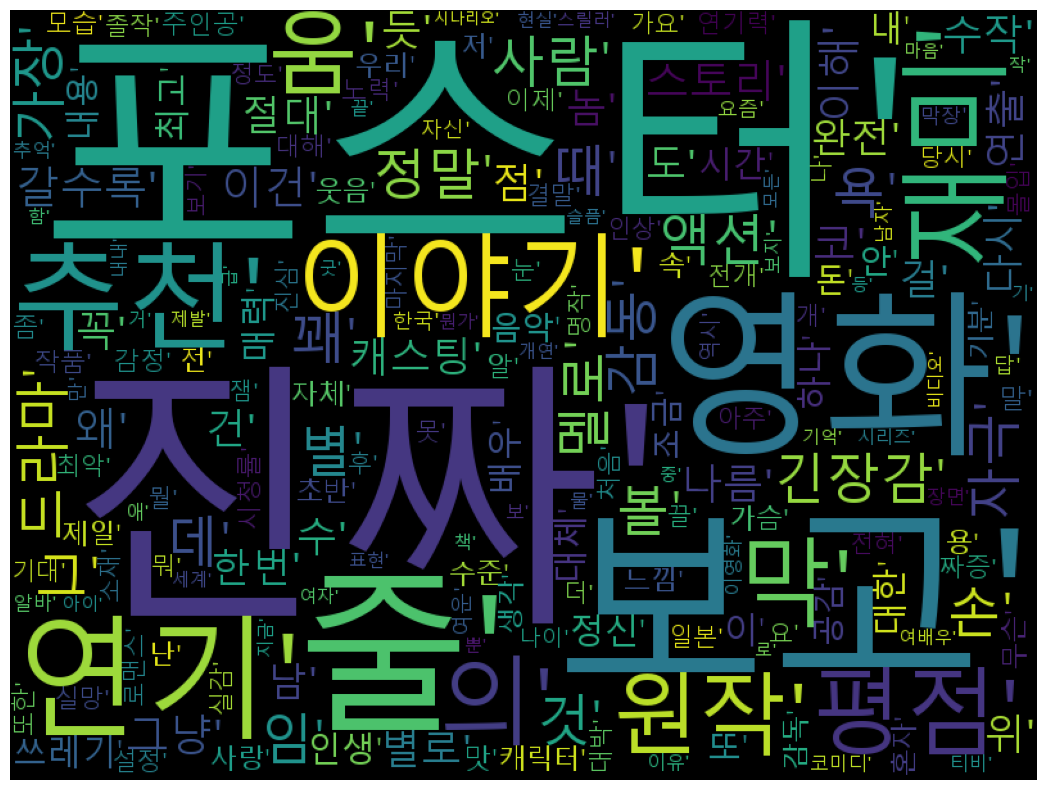

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#malgun.ttf를 업로드
wordcloud = WordCloud(font_path='malgun.ttf', background_color = "black", width = 800, height = 600).generate(words)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


3. 유사도 계산해보기

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(tfidf_matrix_train[30,:] , tfidf_matrix_train[100,:]))
print(train_df.document[30])
print(train_df.document[100])

print(cosine_similarity(tfidf_matrix_train[30,:] , tfidf_matrix_train[30,:]))

[[0.12931143]]
엄포스의 위력을 다시 한번 깨닫게 해준 적.남 꽃검사님도 연기 정말 좋았어요! 완전 명품드라마!
신카이 마코토의 작화와,미유와 하나카나가 연기를 잘해줘서 더대박이였다.
[[1.]]


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(tfidf_matrix_train[30,:] , tfidf_matrix_train[100,:])
euclidean_distances(tfidf_matrix_train[100,:] , tfidf_matrix_train[100,:])
euclidean_distances(tfidf_matrix_train[30,:] , tfidf_matrix_train)

In [ ]:
from sklearn.metrics import jaccard_score
import numpy as np

binary = np.array( [ [0,1,1,1,1], [1, 1, 1, 1,0]])

jaccard_score(binary[0,:] , binary[1,:])

0.6

# 2.군집분석 리뷰
- k-means

In [ ]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0
km_cluster = KMeans(n_clusters=4)
km_cluster.fit(tfidf_matrix_train)  #DTM을 입력으로 넣음
cluster_label = km_cluster.labels_
cluster_label #각각의 document가 몇번 군집인지를 알려주는 결과

cluster_centers = km_cluster.cluster_centers_#각 군집이 갖는 38개 단어 tfidf의 평균
#군집별 특성을 확인
np.argmax( cluster_centers[1,:])  #군집별로 평균 tfidf가 가장 높은 단어를 확인

#print(cluster_centers)
np.argmax( cluster_centers[1,:])  #군집별로 평균 tfidf가 가장 높은 단어를 확인


133

In [ ]:
print( train_df.document[0])
print( train_df.document[2])

아 더빙.. 진짜 짜증나네요 목소리
너무재밓었다그래서보는것을추천한다


In [ ]:
train_df['cluster_label'] = cluster_label
train_df.head()

In [ ]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3) #군집의 갯수 지정
km_cluster.fit(tfidf_matrix_train)
cluster_label = km_cluster.labels_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
train_df['cluster_label'] = cluster_label
train_df.sort_values(by='cluster_label')

id                                           document  label  \
0     9976970                                아 더빙.. 진짜 짜증나네요 목소리      0   
315   8830133                                 아 츠무구만 없어지면 별 5개줄게      0   
314   9360766       많은생각을 하게 됐습니다. 예뼈지고 싶은 맘은 있었지만 과하면 독이겠네요. ^^      1   
313   8520381  곤사토시 감독... 2010년 안타깝게 돌아가셔서 가슴이 먹먹합니다.. 정말 천재적...      1   
312    214940                          잊을 수 없는 안개낀 워터루 다리와 마스코트.      1   
..        ...                                                ...    ...   
44    8548510  윤제문이라는 멋진 배우를 발견하게 됐어요. 소소한 일탈이 잔잔한 미소를 머금게 합니...      1   
387  10232830  림프비즈킷의 OST만 10점. 개봉 당시 극장에서 봤는데 영화내내 오우삼 쥑이고 싶...      0   
78    7884025  한국영화 흥행코드: 갈등-갈등-계~에속 갈등-화해-감동- 평점 10점 남발- 흥행 ...      0   
263   6931068               필름값이 아깝다..재미 더럽게없다..2점부터 점수준것들 매미 OO      0   
499   9600841                    자동차 매니아인 나의 평점은 5점 이하~속았다...아오~      0   

     cluster_label  
0                0  
315              0  
314              0  
313              0  
312              0  
..             ...  
44               2  
387              2  
78               2  
263              2  
499              2  

[500 rows x 4 columns]

In [ ]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 38)
[[0.02162234 0.01888703 0.02804081 0.01599812 0.02103662 0.02639393
  0.02063558 0.01381332 0.01302035 0.01985272 0.02069286 0.01510443
  0.01832173 0.02214814 0.01945078 0.02140421 0.02536498 0.01612536
  0.02328878 0.0114109  0.0192502  0.01985916 0.04558067 0.03448599
  0.01837682 0.02395451 0.03220016 0.0188741  0.01968561 0.00095307
  0.05101286 0.02243804 0.02061664 0.01210284 0.03379679 0.02777228
  0.01614779 0.01591662]
 [0.00893599 0.03456015 0.         0.         0.02225832 0.01545748
  0.02288731 0.02078887 0.0059695  0.02364334 0.         0.02107672
  0.00611226 0.02230409 0.         0.         0.02441607 0.01214073
  0.00550572 0.01627523 0.00444832 0.03242388 0.04047475 0.72513209
  0.         0.0088094  0.03149381 0.00884473 0.01815539 0.
  0.03359921 0.01734257 0.00598335 0.01212939 0.03517838 0.04141912
  0.01314494 0.02326206]
 [0.         0.02576664 0.02161592 0.         0.         0.
  0.         0.         0.         0.         0.  

- 영화리뷰 테스트셋에서 1000개의 리뷰를 대상으로 Okt로 명사만 출력을 해서 (min_df=5), 워드 클라우드 + kmeans 군집을 수행(k=4)


- Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(linkage='ward', n_clusters=10)
#linkage ward, complete, average, 기본값은 ward (ward는 거리가 euclidean에서 가능)
hclust.fit(tfidf_matrix_train.todense())
hclust.labels_	#각 자료에 대한 클러스터 결과

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array([3, 1, 0, 4, 2, 7, 0, 2, 4, 4, 3, 0, 1, 1, 1, 0, 1, 4, 6, 0, 0, 0,
       4, 7, 0, 0, 0, 0, 0, 9, 2, 1, 4, 4, 5, 0, 2, 0, 0, 4, 7, 0, 4, 4,
       9, 4, 1, 4, 1, 0, 1, 0, 0, 0, 0, 0, 5, 1, 7, 0, 0, 1, 0, 0, 5, 1,
       0, 9, 7, 3, 7, 0, 0, 1, 0, 7, 0, 0, 9, 0, 0, 5, 0, 0, 6, 5, 0, 0,
       0, 1, 7, 0, 0, 0, 7, 0, 7, 0, 3, 4, 1, 0, 1, 0, 0, 8, 0, 7, 0, 4,
       7, 0, 1, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 9, 0, 0, 4, 1, 2, 7, 0, 1,
       0, 7, 0, 6, 0, 0, 1, 0, 0, 2, 1, 4, 0, 3, 1, 3, 4, 1, 8, 0, 2, 0,
       7, 6, 4, 4, 4, 9, 0, 7, 7, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 4,
       0, 6, 1, 0, 1, 1, 1, 0, 0, 0, 0, 9, 8, 0, 5, 0, 7, 0, 1, 1, 0, 1,
       4, 1, 0, 0, 1, 1, 1, 0, 6, 0, 6, 7, 1, 0, 1, 5, 0, 0, 4, 4, 0, 7,
       1, 4, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 3, 2, 0, 0, 8, 8, 0, 2, 0, 0,
       1, 0, 0, 0, 1, 0, 3, 4, 0, 0, 3, 2, 7, 0, 0, 0, 7, 7, 1, 4, 3, 9,
       4, 7, 0, 9, 0, 7, 7, 0, 4, 0, 1, 0, 2, 4, 0, 0, 1, 2, 0, 0, 0, 4,
       1, 0, 1, 0, 4, 0, 1, 4, 7, 0, 2, 6, 4, 2, 7,

# 3. 토픽모델링
-lda 기본 활용

0. 수집된 자료로 아래 1과 2를 생략

In [ ]:
!pip install pyLDAvis

In [ ]:
import pandas as pd
df = pd.read_csv("news.csv", index_col=0)

In [ ]:
# 아래의 코드를 활용하셔서 관심있으신 키워드에 대한 뉴스를 수집하시고,
# 토픽을 발견하셔서(적절한 개수도 찾아보세요) 해석도 하시고
# 시각화도 해보세요~
# 32분까지 해보세요

1. 수집대상 뉴스 검색 및 제목 저장

In [ ]:
from bs4 import BeautifulSoup
from lxml import etree
from urllib import parse
import requests
import urllib.request
import urllib.parse
import numpy as np
import pandas as pd
import time

#----------------------------------------------#
#변경할 부분
startdate = "2022.04.16"
enddate = "2022.04.30"
searchword ="전기차"#검색어
#----------------------------------------------#

base_url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query"+parse.urlencode([('',searchword)], doseq=True)+"&sort=1&photo=3&field=0&pd=3&ds="+startdate+"&de="+enddate+"&mynews=1&office_type=0&office_section_code=0&news_office_checked=&nso=so:dd,p:from"+startdate.replace(".", "")+"to"+enddate.replace(".", "")+",a:all&mynews=0&start="
titles = [ ]
urls = [ ]
i=1

while True:
 try:
    time.sleep(0.45)
    url = base_url+str(i)
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')
    t_news = soup.select('a.news_tit')  #클래스 표시
    t_len = len(t_news)

    if t_len <1:
        break

    for j in np.arange(t_len)+1:
            try:
                titles.append(soup.select('a.news_tit')[j].text)
                urls.append(soup.select('a.info')[j]['href'])
            except Exception as e:
                continue
    i=i+10

 except Exception as e:
    continue

result = pd.DataFrame({"Url": urls, "Title":titles})
result.Url[0]

'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=105&oid=023&aid=0003688540'

2. 본문 수집

In [ ]:
articles = []
dates = []

for i in result.Url:
   try:
    if( "news.naver.com" in i ): #바뀐곳
     print(i)
     time.sleep(0.45)
     html = urllib.request.urlopen(i).read()
     soup = BeautifulSoup(html, 'html.parser')

     news = soup.select('div#dic_area')[0].text #id #, class.
     news_date = soup.select('span.media_end_head_info_datestamp_time._ARTICLE_DATE_TIME')[0].text  #네이버 뉴스의 날짜 시간 부분 지정

     articles.append(news)
     dates.append(news_date.split()[0])

   except Exception as e:
    print(e)
    continue


https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=105&oid=023&aid=0003688540
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=110&oid=020&aid=0003425728
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=353&aid=0000042135
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=009&aid=0004957385
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003691184
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=103&oid=015&aid=0004692436
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=277&aid=0005081994
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=016&aid=0001984789
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=105&oid=016&aid=0001984778
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=016&aid=0001984767
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=020&aid=0003425570
https://news.naver.com/main/read

In [ ]:
# 수집된 내용을 표로 정리하기, news컬럼, date컬럼, likes컬럼
df = pd.DataFrame({'news':articles, 'date':dates})
df

In [ ]:
df.news.str

3. 전처리 및 명사 추출

In [ ]:
!pip install konlpy
!pip install tqdm #진행상태를 알려주는 기능 제공

import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm

In [ ]:
train_data['articles'][0]

"게티이미지뱅크 콩나물(사진)은 대두를 발아시켜 뿌리를 자라게 한 것이다. 동의보감에 따르면 콩나물은 온 몸이 무겁고 저리거나 근육과 뼈가 아플 때 도움이 되고 제반 염증을 억제하는 효과가 뛰어나다고 돼 있다.콩나물에 들어있는 식물 단백질인 '아스파라긴산'은 1806년 프랑의 과학자 아스파라거스가 발견해 이름이 붙여졌다. 아스파라긴산은 암모니아 대사를 촉진해 독소를 흡수하고 혈액을 통해 제거하므로 간 건강에 도움이 된다. 이 때문에 숙취해소에 탁월한 효과를 보인다. 또 콩팥의 기능을 돕고 요산배설을 촉진시킴과 동시에 신경통이나 류머티즘에 효과를 보인다.콩나물은 대두 상태일 때는 비타민이 없지만 발아하는 과정에서 합성돼 비타민C가 풍부해진다. 비타민C는 피부를 맑고 투명하게 가꿔주고 면역력을 높여준다. 하지만 콩나물을 조리하는 과정에서 비타민C가 파괴되기 때문에 가볍게 조리해 섭취하는 게 좋다.정명진 의학전문기자 pompom@fnnews.com 정명진 기자 ▶ 세상의 모든 골 때리는 이야기 'fn파스'▶ 속보이는 연예뉴스 fn스타 ※ 저작권자 ⓒ 파이낸셜뉴스. 무단 전재-재배포 금지"

In [ ]:
print(df.isnull().values.any()) #null값이 있는지 체크
train_data = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

train_data['articles'] = train_data['articles'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

False
False


In [ ]:
train_data.articles

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      게티이미지뱅크 콩나물(사진)은 대두를 발아시켜 뿌리를 자라게 한 것이다. 동의보감에...
1      사진 한 장 없이 떠난 일지 스님 불교 현실에 대한 질타 등 생전에 연재했던 글, ...
2      이재익의 아재음악 열전전태관(왼쪽)과 김종진. <한겨레> 자료사진 2018년을 얼마...
3      서울대병원 제공서울대병원은 올해 1월부터 국내에서 독자적으로 개발한 인공지능 기술을...
4      ㆍ2.1㎓ 속도 ‘엑시노스 오토 V9’ㆍ2021년 생산 차량부터 탑재2021년 생산...
                             ...                        
395    박정호 SK텔레콤 사장이 SK브로드밴드 사장을 겸직한 이후 첫 행보로 ‘옥수수 연합...
396    LG전자가 세계 최초 88인치 8K OLED TV를 내놓는다. 인공지능(AI) 기술...
397    게임은 사회악 아닌 건전한 놀이문화(지디넷코리아=이도원 기자)"게임산업 전체의 발전...
398    10여년 만에 매출예상치 하향…주가도 폭락(지디넷코리아=김익현 기자)최근 10년 여...
399    [머니투데이 판교(경기)=김지영 기자] [최대주주 지분 매각설에 '긴장감' 흘러…게...
Name: articles, Length: 400, dtype: object

In [ ]:
Okt().nouns(train_data['articles'][0])

In [ ]:
lst1 = [ ["첫", "번째", "뉴스"], ["두", "번째", "뉴스"]]
lst2 = []
lst2.append( lst1[0] )

#lst1의 각 값(=리스트)을 출력
for i in lst1:
     print(i)

[ i for i in lst1]

['첫', '번째', '뉴스']
['두', '번째', '뉴스']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['첫', '번째', '뉴스'], ['두', '번째', '뉴스']]

In [ ]:
#값을 저장할 비어있는 리스트를 만듬.
tokenized_data = []

# 불용어 정의
stopwords = ['을', 'ㅋㅋ', '수', '것',
             '부터', '까지' '적', '의','가','이','은',
             '들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다', '점', '나']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt() #후진...Kkma

for sentence in tqdm(train_data['articles']): #리뷰 각각에 대해서 아래작업 반복
    tokenized_sentence = okt.nouns(sentence)  #각 리뷰에서 명사만 뽑아서 리스트
    #위에서 명사만 추출한 결과에서, 각 명사가 stopwords인지 체크하고
    #stopwords 아닌 명사만 사용함
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

len(tokenized_data)

100%|██████████| 400/400 [00:43<00:00,  9.30it/s]


400

In [ ]:
#tokenized_sentence[]
tokenized_data  #각 신문기사에서 나온 명사로 구성된 리스트들의 리스트
tokenized_data[0]

4. 워드클라우드 표현을 위해 토큰 결과에서 중복 제거 후 문자열로 변경

In [ ]:
words = []
for q in tokenized_data:
  for v in q: #각 신문기사의 명사들에 대해서
    if v not in words:
        words.append(v)

words = str(words)  #리스트->문자열로 변환

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- 워드클라우드 (malgun.ttf를 업로드 필요)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


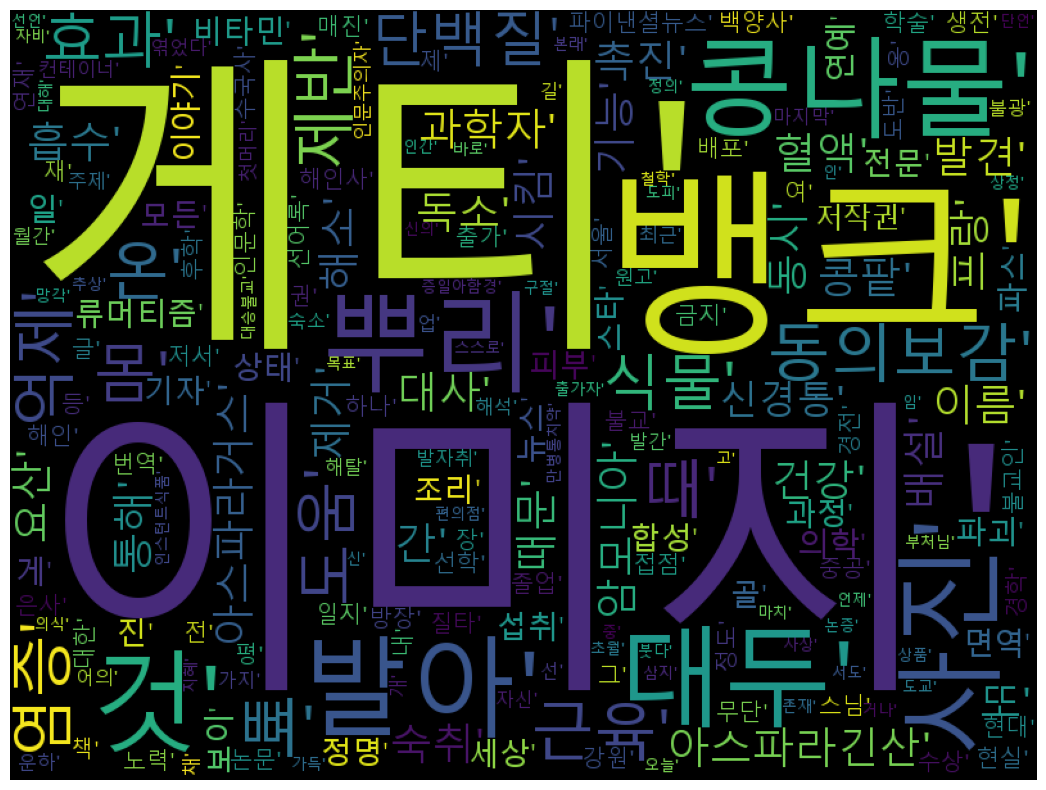

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#malgun.ttf를 업로드
wordcloud = WordCloud(font_path='malgun.ttf', background_color = "black", width = 800, height = 600).generate(" ".join(train_data['articles']))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

5. LDA 적용

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_data) #사전 구성
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS,
                                           id2word=dictionary, passes=15)
#corpora.Dictionary.save("test.id2word")
#corpora.Dictionary.load("test.id2word")
#gensim.models.ldamodel.LdaModel.save / load "test.lda"

In [ ]:
#각 토픽의 출현확률이 높은 단어를 지정된 갯수만큼 반환
topics = ldamodel.print_topics(num_words=20)

In [ ]:
#위 내용을 출력
for topic in topics:
    print(topic)

(0, '0.016*"전자" + 0.010*"기술" + 0.009*"등" + 0.006*"지능" + 0.006*"인공" + 0.005*"하나님" + 0.005*"공개" + 0.004*"서비스" + 0.004*"말" + 0.004*"시스템" + 0.004*"탑재" + 0.004*"사진" + 0.004*"화면" + 0.004*"그" + 0.004*"세계" + 0.004*"출시" + 0.003*"적용" + 0.003*"통해" + 0.003*"올해" + 0.003*"모델"')
(1, '0.009*"등" + 0.007*"시장" + 0.005*"체인" + 0.005*"블록" + 0.005*"기자" + 0.005*"올해" + 0.004*"지난해" + 0.004*"고" + 0.004*"말" + 0.004*"기술" + 0.004*"한국" + 0.004*"재" + 0.004*"폰" + 0.004*"사업" + 0.004*"스마트폰" + 0.003*"전망" + 0.003*"산업" + 0.003*"금융" + 0.003*"플랫폼" + 0.003*"위"')
(2, '0.026*"게임" + 0.019*"넥슨" + 0.015*"대표" + 0.011*"국내" + 0.011*"업계" + 0.010*"등" + 0.010*"매각" + 0.009*"콘텐츠" + 0.009*"김" + 0.009*"분" + 0.007*"시장" + 0.007*"중국" + 0.007*"인수" + 0.006*"서비스" + 0.006*"텔레콤" + 0.006*"지상파" + 0.006*"산업" + 0.005*"회사" + 0.005*"기자" + 0.005*"텐센트"')
(3, '0.009*"기술" + 0.008*"등" + 0.008*"서비스" + 0.006*"암호" + 0.005*"그" + 0.005*"교회" + 0.004*"고" + 0.004*"기업" + 0.004*"채굴" + 0.004*"장비" + 0.004*"재" + 0.004*"및" + 0.004*"대표" + 0.004*"한국" + 0.003*"개" + 0.003*"말" 

In [ ]:
ldamodel.get_document_topics(corpus[0],minimum_probability=0)

In [ ]:
[list(dict(ldamodel.get_document_topics(doc, minimum_probability=0)).values())
for doc in corpus]
#document별 topic의 발생확률->리스트 of 리스트

In [ ]:
pd.DataFrame( [list(dict(ldamodel.get_document_topics(doc, minimum_probability=0)).values()) for doc in corpus] )

6. LDA 시각화

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary, sort_topics=True)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7. LDA의 토픽 개수 탐색

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

coherence_values = []
model_list = []
iters = [8, 9,10, 11, 12]

for num_topics in iters:
     model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
     model_list.append(model)
     coherencemodel = CoherenceModel(model=model, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
     coherence_values.append(coherencemodel.get_coherence())

for i in range(0, len(iters)):
  print(model_list[i], coherence_values[i])  #topic num별로 coherence 가 높은 것을 찾기

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LdaModel<num_terms=14471, num_topics=8, decay=0.5, chunksize=2000> 0.2763253721230009
LdaModel<num_terms=14471, num_topics=9, decay=0.5, chunksize=2000> 0.3036899062190605
LdaModel<num_terms=14471, num_topics=10, decay=0.5, chunksize=2000> 0.29718745873212427
LdaModel<num_terms=14471, num_topics=11, decay=0.5, chunksize=2000> 0.318585573646835
LdaModel<num_terms=14471, num_topics=12, decay=0.5, chunksize=2000> 0.29930156853206363


In [ ]:
#data_sent_new.csv를 읽으셔서, 연령대는 청년, 감정 대분류는 기쁨이라는 범주를 선택하셔서,
#토픽을 47분까지 찾아보시고 해석도 해보세요~

#4. 임베딩(w2v + d2v)

1. Word2Vec 활용

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data,
                 vector_size = 50,
                 window = 5,
                 min_count = 5,
                 workers = 4, sg = 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
import numpy as np
model.wv.vectors.shape
model.wv.vectors[1]

np.mean( (model.wv.vectors[2]-model.wv.vectors[1])**2 )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.0081408005

In [ ]:
model.wv.key_to_index
model.wv.index_to_key

- 단어 간 거리 계산

In [ ]:
import numpy as np
np.sqrt(np.mean(model.wv.vectors[10]-model.wv.vectors[11])**2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.04717976972460747

- 유사한 단어 발견

In [ ]:
print(model.wv.most_similar("매출"))
print(model.wv.most_similar("배터리"))

[('원', 0.9979270100593567), ('해외', 0.997489333152771), ('관심', 0.9974010586738586), ('제기', 0.997143030166626), ('이유', 0.9971320033073425), ('진출', 0.9970884323120117), ('사실', 0.9970581531524658), ('현재', 0.997020423412323), ('최근', 0.9969537258148193), ('수준', 0.9969391226768494)]
[('당뇨', 0.9908376932144165), ('편의', 0.990553617477417), ('부위', 0.9904773235321045), ('조기', 0.9904640316963196), ('질', 0.9901958107948303), ('비만', 0.9901400804519653), ('군대', 0.9900785684585571), ('기분', 0.9900193810462952), ('폭로', 0.9899413585662842), ('법', 0.9899163842201233)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2. Doc2Vec 활용

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#각 문헌을 나타내는 리스트(단어들로 묶인) 하나하나에 대해 TaggedDocument 적용
#적용하실 때, words에다 각 뉴스를 나타내는 리스트, tags에는 각 뉴스의 아이디 입력
#아이디 입력 시, [아이디] 형태로 입력: 아이디에 해당하는 값을 리스트로 표현해서 입력
tagged_data = [TaggedDocument(words=tokenized_data[i], tags=[i]) for i in range(len(tokenized_data)) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(tagged_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


400

In [ ]:
model = Doc2Vec(
    epochs=40,
    window=5,
    vector_size=5,  #얻고자 하는 컬럼의 수, 한 문서를 몇개의 값의 좌표로 표현,
    min_count=2,  #최소 단어 빈도를 2
    dm =1)  #pv-dm: 1, pv-dbow:2

model.build_vocab(tagged_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.docvecs.vectors

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-61-615016936db2>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.vectors


array([[-0.05230815, -0.05979127, -0.09880754, ..., -0.05166649,
        -0.09717963,  0.02010779],
       [ 0.02830311,  0.04643556, -0.04297275, ...,  0.09225623,
        -0.09501867, -0.03458086],
       [-0.03769909,  0.02607382, -0.05691557, ..., -0.09954669,
         0.04933045, -0.09122308],
       ...,
       [-0.02687379,  0.09182398,  0.01921904, ..., -0.07142128,
        -0.09508411,  0.00584234],
       [-0.0005307 ,  0.01906138, -0.0006667 , ..., -0.09310038,
         0.09573311,  0.05673311],
       [ 0.07258704, -0.04445012, -0.02018584, ...,  0.0431612 ,
         0.01276428,  0.06500938]], dtype=float32)

In [ ]:
doc_list = '전기차 배터리 중요'.split(' ')
doc_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['전기차', '배터리', '중요']

In [ ]:
inferred_vector = model.infer_vector(doc_list)
inferred_vector

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-0.08907109,  0.01106775,  0.01531941,  0.01848712, -0.08976039],
      dtype=float32)

- 유사한 document 발견

In [ ]:
return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=5)
return_docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-38-2e82f67434ad>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=5)


[(270, 0.9570250511169434),
 (202, 0.9013411998748779),
 (236, 0.8723969459533691),
 (250, 0.8686610460281372),
 (56, 0.8575427532196045)]

In [ ]:
return_docs = model.docvecs.most_similar(66,topn=3)
return_docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-b29b1cefbd05>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  return_docs = model.docvecs.most_similar(66,topn=3)


[(186, 0.9339579939842224),
 (214, 0.9231314659118652),
 (314, 0.8570402264595032)]

# 5. 네이버 영화리뷰에 대해서 워드2벡터, Doc2Vec을  적용

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('ratings.txt', <http.client.HTTPMessage at 0x79f89fea9300>)

In [ ]:
df = pd.read_csv("ratings.txt", sep="\t") #값과 값사이가 tab문자로 구분
df = df[0:1000] #1000개의 리뷰만 사용
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id                                           document  label
0     8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1     8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...      1
2     4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.      1
3     9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...      1
4    10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.      1
..        ...                                                ...    ...
995   8089681                                   이준기 연기가 돋보였고 재밌음      1
996   9904906  평점이 왜이리 낮은지.. 공감하고 나를 많이 깨우치게 한영화입니다. 10점주는게 머...      1
997   8290332                                      다시 봐도 최고다~~~~      1
998   6758300                ㅋㅋㅋㅋㅋ진짜 짱임ㅋㅋㅋㅋㅋ거침없이 하이킥과 뉴논은 정말 최고다      1
999   6015848                  우와 정준용 선생님 대박이에요. 정말 대단해요..부럽습니다.      1

[1000 rows x 3 columns]

In [ ]:
!pip install konlpy
!pip install tqdm #진행상태를 알려주는 기능 제공

import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm

print(df.isnull().values.any()) #null값이 있는지 체크
train_data = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False
False


In [ ]:
#값을 저장할 비어있는 리스트를 만듬.
tokenized_data = []

# 불용어 정의
stopwords = ['을', 'ㅋㅋ',
             '부터', '까지' '적', '의','가','이','은',
             '들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다', '점', '나']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

for sentence in tqdm(train_data['document']): #리뷰 각각에 대해서 아래작업 반복
    tokenized_sentence = okt.nouns(sentence)  #각 리뷰에서 명사만 뽑아서 리스트
    #위에서 명사만 추출한 결과에서, 각 명사가 stopwords인지 체크하고
    #stopwords 아닌 명사만 사용함
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

len(tokenized_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 1000/1000 [00:03<00:00, 327.66it/s]


1000

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data,
                 vector_size = 100,
                 window = 5,
                 min_count = 5,
                 workers = 4, sg = 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(model.wv.most_similar("감동"))

[('대해', 0.45786750316619873), ('이해', 0.4569784104824066), ('수', 0.40572816133499146), ('계속', 0.3862457871437073), ('영화', 0.3861188292503357), ('연기', 0.38410520553588867), ('연출', 0.3729959726333618), ('진짜', 0.369366854429245), ('지금', 0.36379608511924744), ('평점', 0.35112759470939636)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.wv.vectors[0]
model.wv.key_to_index.keys()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys(['영화', '정말', '최고', '연기', '진짜', '감동', '생각', '그', '것', '때', '보고', '수', '드라마', '다시', '내', '거', '사람', '지금', '더', '명작', '평점', '마지막', '마음', '재미', '스토리', '사랑', '말', '하나', '볼', '작품', '완전', '현실', '왜', '배우', '추천', '남자', '듯', '느낌', '뭐', '매력', '중', '굿', '이야기', '난', '감독', '장면', '한번', '한국', '저', '액션', '이영화', '꼭', '편', '주인공', '속', '대박', '역시', '정도', '연기력', '또', '기대', '대한', '인생', '가장', '알', '처음', '모습', '개인', '대해', '음악', '자신', '내용', '인간', '이해', '모든', '최고다', '가족', '때문', '연출', '짱', '만', '제', '봄', '이건', '무엇', '여운', '전', '기억', '계속', '그냥', '요', '영상', '일', '코믹', '모두', '눈물', '여자', '날', '걸', '시리즈', '당시', '안', '분', '아주', '함', '뭔가', '웃음', '표현', '만점', '매우', '맘', '언제', '개', '코미디', '기분', '노래', '약간', '임', '시간', '강추', '전쟁', '뿐', '캐릭터', '감', '후회', '움', '보기', '우리', '오페라', '시절', '소재', '끝', '그녀', '제목', '번', '우리나라', '제대로', '더욱', '사실', '이상', '세상', '감정', '수작', '팬', '성룡', '다운', '위', '비판', '제일', '중간', '명', '아버지', '추억', '삶', '결말', '잼', '살', '가슴', '미국', '친구', '내내', '목소리', '재밋다', '몰입', '거지', '간만', '사회', '배경', '나름', '엄마'

In [ ]:
tagged_data = [ TaggedDocument(words = tokenized_data[i], tags=[i]) for i in range(len(tokenized_data))]
len(tagged_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1000

In [ ]:
model = Doc2Vec(
    epochs=40,
    window=5,
    vector_size=10,  #얻고자 하는 컬럼의 수, 한 문서를 몇개의 값의 좌표로 표현,
    min_count=2,  #최소 단어 빈도를 2
    dm =1)  #pv-dm: 1, pv-dbow:2

model.build_vocab(tagged_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#model.docvecs.vectors_docs
model.docvecs.vectors

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-55-bd0336538d02>:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.vectors


array([[-0.05230815, -0.05979127, -0.09880754, ..., -0.05166649,
        -0.09717963,  0.02010779],
       [ 0.02830311,  0.04643556, -0.04297275, ...,  0.09225623,
        -0.09501867, -0.03458086],
       [-0.03769909,  0.02607382, -0.05691557, ..., -0.09954669,
         0.04933045, -0.09122308],
       ...,
       [-0.02687379,  0.09182398,  0.01921904, ..., -0.07142128,
        -0.09508411,  0.00584234],
       [-0.0005307 ,  0.01906138, -0.0006667 , ..., -0.09310038,
         0.09573311,  0.05673311],
       [ 0.07258704, -0.04445012, -0.02018584, ...,  0.0431612 ,
         0.01276428,  0.06500938]], dtype=float32)

In [ ]:
df.label

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: label, Length: 1000, dtype: int64

In [ ]:
doc_list = '주연배우 연기 중요 감독 액션 극장 발연기'.split(' ')
doc_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['주연배우', '연기', '중요', '감독', '액션', '극장', '발연기']

In [ ]:
inferred_vector = model.infer_vector(doc_list)
inferred_vector

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 0.02851426,  0.00502103,  0.03004944, -0.04829016, -0.019588  ,
       -0.0177101 , -0.02785104,  0.04866942, -0.03863888,  0.02552165],
      dtype=float32)

- 유사한 document 발견

In [ ]:
return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=10)
return_docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-59-039c39141f3d>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=10)


[(74, 0.7934443354606628),
 (324, 0.7673429250717163),
 (49, 0.7599236369132996),
 (188, 0.7397239804267883),
 (194, 0.7296202182769775),
 (220, 0.7180415391921997),
 (468, 0.7168328166007996),
 (268, 0.7120748162269592),
 (169, 0.705742359161377),
 (746, 0.6961223483085632)]

In [ ]:
return_docs = model.docvecs.most_similar(348,topn=3)
return_docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-60-85df66fe77e6>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  return_docs = model.docvecs.most_similar(348,topn=3)


[(455, 0.782914400100708), (660, 0.7444680333137512), (745, 0.743675947189331)]